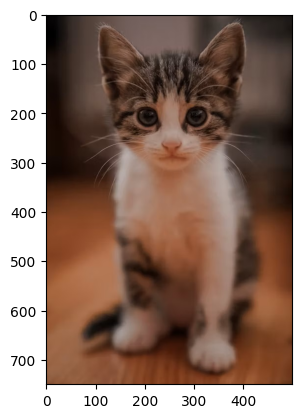

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
input_img=Image.open('/content/cat.jpg')

plt.imshow(input_img)

In [5]:

from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

In [7]:
Transformed_img=transform(input_img)

In [10]:
print(Transformed_img.shape)

torch.Size([3, 224, 224])


In [12]:

import torch
InputImg_Batched = torch.unsqueeze(Transformed_img, 0)

In [14]:
print(InputImg_Batched.shape)

torch.Size([1, 3, 224, 224])


In [16]:
from torchvision import models


In [17]:
resnet = models.resnet101(pretrained = True)

#activating the evaluation mode after this we can feed it to the input
resnet.eval()

#We will feed the batch format input image to the resnet

output = resnet(InputImg_Batched)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 123MB/s]


In [18]:

with open('/content/ImageNet1000Classes.txt') as classesfile:
  ImageNetClasses = [line.strip() for line in classesfile.readlines()]

In [19]:
_, predicted = torch.max(output, 1)
percentage = torch.softmax(output, dim = 1)[0] * 100
print(ImageNetClasses[predicted[0]], percentage[predicted[0]].item())

285: 'Egyptian cat', 90.52701568603516
